In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

### Overall goal to obtain best fit linear regression line: Use MSE in order to find the line with the least amount of error.

In [19]:
df = pd.read_csv('../../data/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


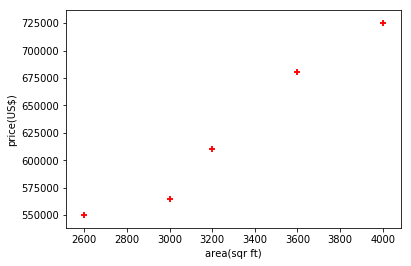

In [20]:
%matplotlib inline

plt.scatter(df.area, df.price, color='red', marker= '+')
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area, df.price, color='red', marker='+')

In [25]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df.price)
# Train the linear model using avaialable datapoints that you pass in
#first arg has to be a 2D array
#second arg is the y axis values



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
reg.predict([[3300]])

array([628715.75342466])

In [32]:
reg.coef_ #Slope or Gradient of linear line

array([135.78767123])

In [34]:
reg.intercept_ # y intercept

180616.43835616432

In [66]:
# y = m*x+b
reg.coef_ * 3300 + 180616.43835616432

array([628715.75342466])

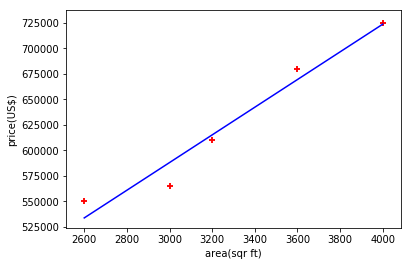

In [70]:
%matplotlib inline

plt.scatter(df.area, df.price, color='red', marker= '+')
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')

plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, reg.predict(df[['area']]), color="blue")

In [60]:
areas_df = pd.read_csv('../../data/areas.csv') # Dataframe object with just area values
areas_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [61]:
reg.predict(areas_df)

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [62]:
# Let's add predicted home values to our area DF
predicted_price = reg.predict(areas_df)

areas_df["predicted_price"] = predicted_price

In [64]:
areas_df.head()

,area,predicted_price
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


In [65]:
areas_df.to_csv("test_house_prediction", index=False)